In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

os.makedirs('../figures', exist_ok = True)

# Define the relative path to the 'src' folder
module_path = os.path.abspath(os.path.join('..', 'src'))

# Add the path to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)

import analysis_utils as utils


In [2]:
# import race data
df_od_race = pd.read_csv("../data/overdose_race_data_clean.csv")

In [3]:

df_od_race.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,race_ethnicity
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN,All,All
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,All,All
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN,All,All
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN,All,All
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN,All,All


In [4]:
#define drug overdose causes as a dictionary
d_death_cause = { 0 : "All overdose deaths", 1 : "Any opioid", 2 : "Natural and semi-synthetic", 3 : "Methadone", 4 : "Other synthetic opioid", 5 : "Heroin"}

In [5]:
# filter for all drug overdose deaths
all_opioid_deaths = df_od_race[df_od_race["PANEL_NUM"] == 1].copy()
all_opioid_deaths["death_cause"] = all_opioid_deaths['PANEL_NUM'].map(d_death_cause)
# remove "All from age_group and sex since we want to look at distinct age_groups and distinct sex
all_opioid_deaths = all_opioid_deaths[(all_opioid_deaths["race_ethnicity"] == "All") & (all_opioid_deaths["sex"] == "All")]

all_opioid_deaths.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,race_ethnicity,death_cause
417,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,2.9,NaN,All,All,Any opioid
418,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,3.0,NaN,All,All,Any opioid
419,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,3.3,NaN,All,All,Any opioid
420,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,4.1,NaN,All,All,Any opioid
421,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,4.5,NaN,All,All,Any opioid


In [6]:
# filter for all drug overdose deaths
synthetic_opioids = [3, 4]
synthetic_opioid_deaths = df_od_race[df_od_race["PANEL_NUM"].isin(synthetic_opioids)].copy()
synthetic_opioid_deaths["death_cause"] = synthetic_opioid_deaths['PANEL_NUM'].map(d_death_cause)
# include "All from race and sex 
synthetic_opioid_deaths = synthetic_opioid_deaths[(synthetic_opioid_deaths["race_ethnicity"] == "All") & (synthetic_opioid_deaths["sex"] == "All")]

synthetic_opioid_deaths.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,race_ethnicity,death_cause
1178,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,0.8,NaN,All,All,Methadone
1195,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,0.3,NaN,All,All,Methadone
1196,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,0.4,NaN,All,All,Methadone
1197,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,0.5,NaN,All,All,Methadone
1198,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,1.0,NaN,All,All,Methadone


✓ Saved: figures/drug_overdose_death_cause_by_drug_type.png


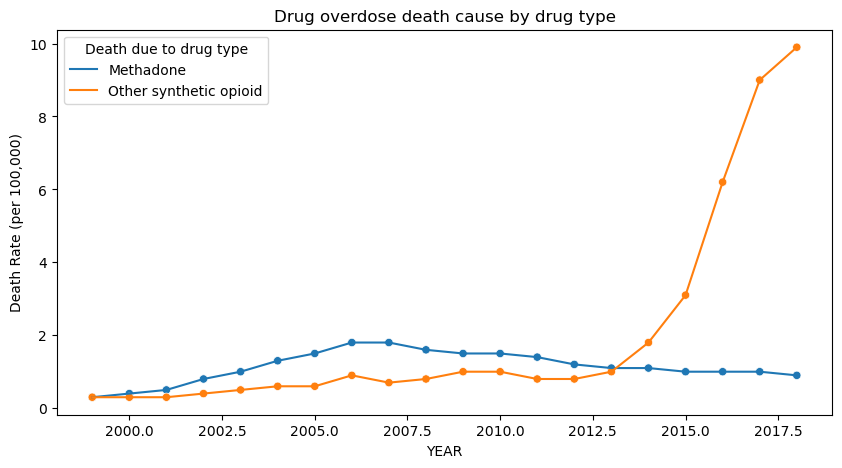

In [7]:
# plot year vs estimated deaths for each drug type

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data = synthetic_opioid_deaths, x='YEAR', y='ESTIMATE', hue='death_cause')
sns.lineplot(data = synthetic_opioid_deaths, x='YEAR', y='ESTIMATE', hue='death_cause')
# Add a legend and show the plot
ax.set_ylabel('Death Rate (per 100,000)')

# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a dictionary to store unique labels and handles, which automatically removes duplicates
# Using dict.fromkeys preserves the insertion order in Python 3.7+
unique_labels_handles = dict(zip(labels, handles))

# Extract the unique handles and labels
unique_handles = unique_labels_handles.values()
unique_labels = unique_labels_handles.keys()

# Apply the unique handles and labels to the legend
ax.legend(unique_handles, unique_labels, title='Death due to drug type')


ax.set_title('Drug overdose death cause by drug type')

fig.savefig('../figures/drug_overdose_death_cause_by_drug_type.png', dpi=300, bbox_inches='tight')
print("✓ Saved: figures/drug_overdose_death_cause_by_drug_type.png")


In [8]:

s_o_d = synthetic_opioid_deaths[["YEAR", "PANEL_NUM", "ESTIMATE", "death_cause"]]
a_o_d = all_opioid_deaths[["YEAR", "PANEL_NUM", "ESTIMATE", "death_cause"]]

In [9]:

combined_df = pd.merge(s_o_d, a_o_d, on = ["YEAR"], how = 'inner', suffixes=('_left', '_right'), sort=True)
combined_df["ratio"] = combined_df["ESTIMATE_left"] / combined_df["ESTIMATE_right"]
combined_df.head(5)

,YEAR,PANEL_NUM_left,ESTIMATE_left,death_cause_left,PANEL_NUM_right,ESTIMATE_right,death_cause_right,ratio
0,1999,3,0.3,Methadone,1,2.9,Any opioid,0.103448
1,1999,4,0.3,Other synthetic opioid,1,2.9,Any opioid,0.103448
2,2000,3,0.4,Methadone,1,3.0,Any opioid,0.133333
3,2000,4,0.3,Other synthetic opioid,1,3.0,Any opioid,0.100000
4,2001,3,0.5,Methadone,1,3.3,Any opioid,0.151515


✓ Saved: figures/drug_overdose_death_ratio_opioids.png


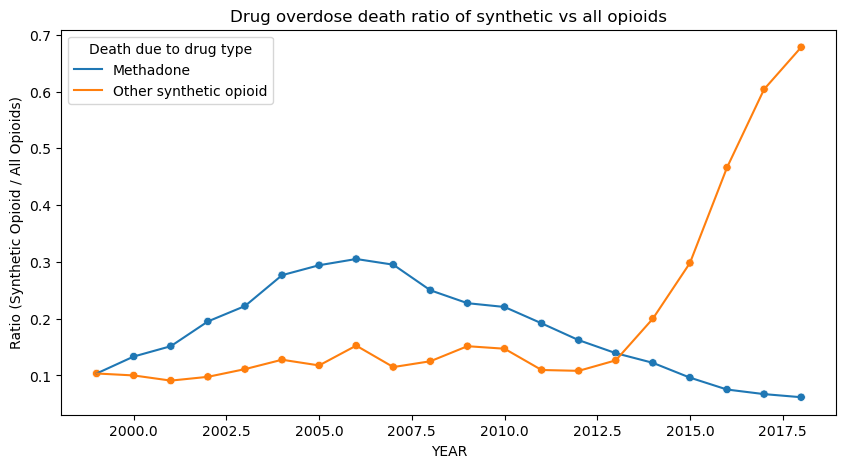

In [10]:
# plot year vs ratio for each drug type

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data = combined_df, x='YEAR', y='ratio', hue='death_cause_left')
sns.lineplot(data = combined_df, x='YEAR', y='ratio', hue='death_cause_left')
# Add a legend and show the plot
ax.set_ylabel('Ratio (Synthetic Opioid / All Opioids)')

# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a dictionary to store unique labels and handles, which automatically removes duplicates
# Using dict.fromkeys preserves the insertion order in Python 3.7+
unique_labels_handles = dict(zip(labels, handles))

# Extract the unique handles and labels
unique_handles = unique_labels_handles.values()
unique_labels = unique_labels_handles.keys()

# Apply the unique handles and labels to the legend
ax.legend(unique_handles, unique_labels, title='Death due to drug type')


ax.set_title('Drug overdose death ratio of synthetic vs all opioids')

fig.savefig('../figures/drug_overdose_death_ratio_opioids.png', dpi=300, bbox_inches='tight')
print("✓ Saved: figures/drug_overdose_death_ratio_opioids.png")


In [11]:
# filter for all drug overdose deaths by race
all_opioid_deaths_by_race = df_od_race[df_od_race["PANEL_NUM"] == 1].copy()
all_opioid_deaths_by_race["death_cause"] = all_opioid_deaths_by_race['PANEL_NUM'].map(d_death_cause)

all_opioid_deaths_by_race = all_opioid_deaths_by_race[all_opioid_deaths_by_race["race_ethnicity"] != "All"]
all_opioid_deaths_by_race = all_opioid_deaths_by_race[~all_opioid_deaths_by_race["race_ethnicity"].str.contains("Not", case=False)]

all_opioid_deaths_by_race.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,race_ethnicity,death_cause
474,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,1999,1,All ages,1.1,4.4,NaN,Male,White,Any opioid
475,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2000,2,All ages,1.1,4.5,NaN,Male,White,Any opioid
476,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2001,3,All ages,1.1,5.0,NaN,Male,White,Any opioid
477,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2002,4,All ages,1.1,6.1,NaN,Male,White,Any opioid
478,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2003,5,All ages,1.1,6.7,NaN,Male,White,Any opioid


In [12]:
# filter for synthetic opioid deaths by race

synthetic_opioid_deaths_by_race = df_od_race[df_od_race["PANEL_NUM"].isin(synthetic_opioids)].copy()
synthetic_opioid_deaths_by_race["death_cause"] = synthetic_opioid_deaths_by_race['PANEL_NUM'].map(d_death_cause)
# include "All from race and sex 
synthetic_opioid_deaths_by_race = synthetic_opioid_deaths_by_race[(synthetic_opioid_deaths_by_race["race_ethnicity"] != "All")]
synthetic_opioid_deaths_by_race = synthetic_opioid_deaths_by_race[~synthetic_opioid_deaths_by_race["race_ethnicity"].str.contains("Not", case=False)]

synthetic_opioid_deaths_by_race.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,race_ethnicity,death_cause
1251,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,1999,1,All ages,1.1,0.4,NaN,Male,White,Methadone
1252,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2000,2,All ages,1.1,0.5,NaN,Male,White,Methadone
1253,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2001,3,All ages,1.1,0.7,NaN,Male,White,Methadone
1254,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2002,4,All ages,1.1,1.2,NaN,Male,White,Methadone
1255,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: White,4.1,2003,5,All ages,1.1,1.6,NaN,Male,White,Methadone


In [13]:

s_o_d_race = synthetic_opioid_deaths_by_race[["YEAR", "PANEL_NUM", "ESTIMATE", "race_ethnicity", "sex", "death_cause"]]
a_o_d_race = all_opioid_deaths_by_race[["YEAR", "PANEL_NUM", "ESTIMATE", "race_ethnicity", "sex", "death_cause"]]


In [14]:

combined_df_race = pd.merge(s_o_d_race, a_o_d_race, on = ["YEAR", "race_ethnicity", "sex"], how = 'inner', suffixes=('_left', '_right'), sort=True)
combined_df_race.head(5)

,YEAR,PANEL_NUM_left,ESTIMATE_left,race_ethnicity,sex,death_cause_left,PANEL_NUM_right,ESTIMATE_right,death_cause_right
0,1999,3,0.2,Black or African American,Female,Methadone,1,1.5,Any opioid
1,1999,3,0.2,Black or African American,Male,Methadone,1,5.7,Any opioid
2,1999,3,0.4,Hispanic or Latino: All races,Male,Methadone,1,5.8,Any opioid
3,1999,4,0.2,Hispanic or Latino: All races,Male,Other synthetic opioid,1,5.8,Any opioid
4,1999,3,0.2,White,Female,Methadone,1,1.5,Any opioid


In [15]:

combined_df_merged = combined_df_race.groupby(["YEAR", "race_ethnicity"]).sum(["ESTIMATE_left", "ESTIMATE_right"]).reset_index()
combined_df_merged["ratio"] = combined_df_merged["ESTIMATE_left"] / combined_df_merged["ESTIMATE_right"]
combined_df_merged = combined_df_merged[(combined_df_merged["YEAR"] >= 2010) & (combined_df_merged["YEAR"] <= 2018)]
combined_df_merged.head(5)

,YEAR,race_ethnicity,PANEL_NUM_left,ESTIMATE_left,PANEL_NUM_right,ESTIMATE_right,ratio
39,2010,American Indian or Alaska Native,10,4.5,3,17.7,0.254237
40,2010,Black or African American,14,1.9,4,13.2,0.143939
41,2010,Hispanic or Latino: All races,14,1.7,4,11.4,0.149123
42,2010,White,14,5.8,4,31.4,0.184713
43,2011,American Indian or Alaska Native,6,3.2,2,13.1,0.244275


✓ Saved: figures/drug_overdose_death_ratio_opioids_by_race.png


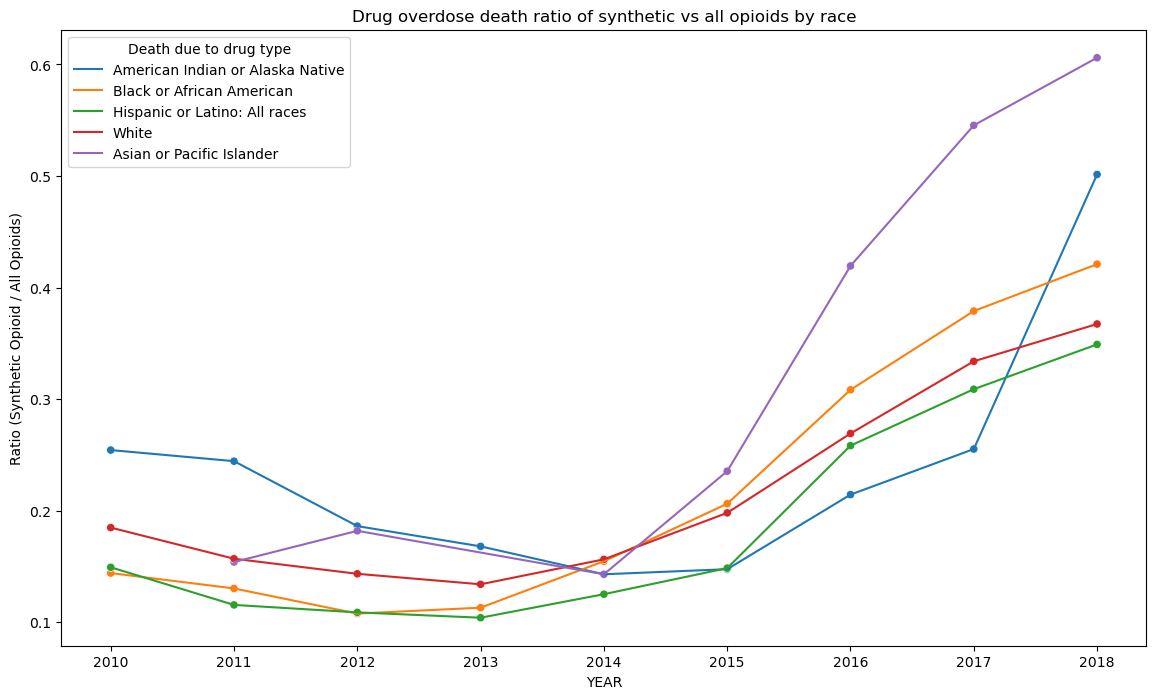

In [16]:
# plot year vs ratio for each race

fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(data = combined_df_merged, x='YEAR', y='ratio', hue='race_ethnicity')
sns.lineplot(data = combined_df_merged, x='YEAR', y='ratio', hue='race_ethnicity')
# Add a legend and show the plot
ax.set_ylabel('Ratio (Synthetic Opioid / All Opioids)')

# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a dictionary to store unique labels and handles, which automatically removes duplicates
# Using dict.fromkeys preserves the insertion order in Python 3.7+
unique_labels_handles = dict(zip(labels, handles))

# Extract the unique handles and labels
unique_handles = unique_labels_handles.values()
unique_labels = unique_labels_handles.keys()

# Apply the unique handles and labels to the legend
ax.legend(unique_handles, unique_labels, title='Death due to drug type')


ax.set_title('Drug overdose death ratio of synthetic vs all opioids by race')

fig.savefig('../figures/drug_overdose_death_ratio_opioids_by_race.png', dpi=300, bbox_inches='tight')
print("✓ Saved: figures/drug_overdose_death_ratio_opioids_by_race.png")


In [17]:
# Calculate the highest proportion shift by race
highest_proportion_shift = combined_df_merged.sort_values(by = "ratio", ascending=False).head(1)
highest_proportion_shift

print(f"The race with the highest proportion shift is '{highest_proportion_shift["race_ethnicity"].iloc[0]}' in {highest_proportion_shift["YEAR"].iloc[0]}")

The race with the highest proportion shift is 'Asian or Pacific Islander' in 2018
